# Filmes nas Plataformas de Stremings

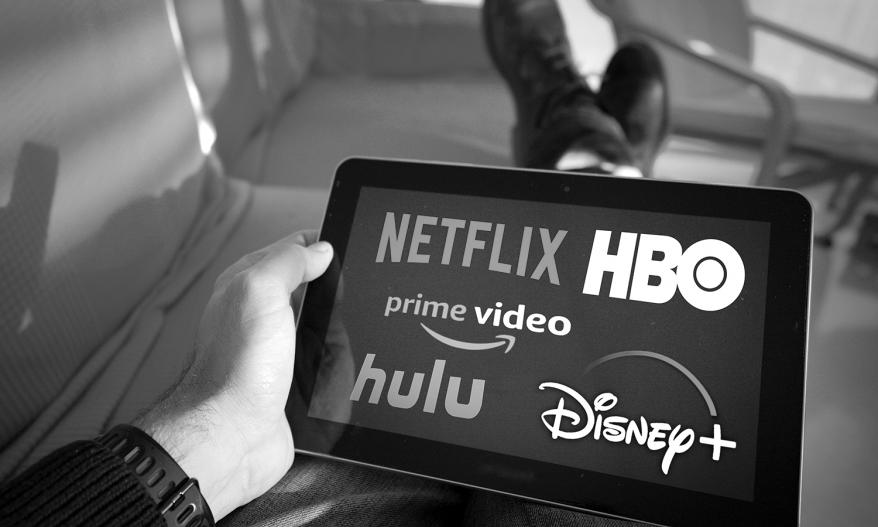

O streaming é uma tecnologia que permite a transmissão de dados de áudio ou video em tempo real de um servidor para um dispositivo que permita a visualização desses dados. Algumas vantagens dos serviços de streaming são o armazenamento de forma temporária nos aparelhos, não ocupando espaço em disco, além da alta velocidade no envio dos dados e, também, um grande catálogo de produções por um preço acessível ao grande público. Assim, a popularização das plataformas que oferecem esse serviço transformou radicalmente a forma como a sociedade consome músicas, filmes e séries. 

Neste dataset estão contidos os filmes presentes em 4 plataformas de streaming:

* [`Netflix`](https://pt.wikipedia.org/wiki/Netflix) - Fundada em 1997 nos Estados Unidos, surgiu como um serviço de entrega de DVD pelo correio e se expandiu para o serviço de streaming a partir de 2007

* [`Hulu`](https://pt.wikipedia.org/wiki/Hulu) - Lançada em 2007, é uma empresa de entretenimento americana que fornece tanto serviços de streaming quanto de hospedagem de arquivos, sendo controlada majoritariamente pela The Walt Disney Company. Tem como grande desvantagem estar disponível apenas no territorio dos Estados Unidos e do Japão.
* [`Prime Video`](https://pt.wikipedia.org/wiki/Prime_Video) - Estreou em 2006 como Amazon Unbox, após algumas trocas de nome, em 2015 assumiu o nome de Prime Video e tem como proprietária a Amazon.
* [`Disney+`](https://pt.wikipedia.org/wiki/Disney%2B) - Lançada em 2019 nos Estados Unidos, oferece em seu catálogo filmes e séries de televisão produzidas pela The Walt Disney Company, sua proprietária.

O conjunto de dados foi disponibilizado no [kaggle](https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney).

## Objetivo da Análise

O objetivo desta análise exploratória é obter insights acerca dos filmes presentes nas plataformas de streaming de forma geral, assim como, entender as principais diferenças entre cada plataforma.

## Importando Bibliotecas e o Dataset

In [1]:
# Importando as Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
# Importando o Dataset

df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [3]:
# Primeiras linhas do dataset

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


Retirando colunas que não vamos usar na nossa análise

In [4]:
df.drop(['Unnamed: 0', 'ID', 'Type', 'Directors'], axis=1, inplace=True)

In [5]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,Roma,2018,18+,7.7/10,94/100,1,0,0,0,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


Vamos obter algumas informações do conjunto de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              5338 non-null   object 
 3   IMDb             9309 non-null   object 
 4   Rotten Tomatoes  9508 non-null   object 
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Genres           9399 non-null   object 
 10  Country          9261 non-null   object 
 11  Language         9202 non-null   object 
 12  Runtime          9196 non-null   float64
dtypes: float64(1), int64(5), object(7)
memory usage: 966.5+ KB


O conjunto de dados possui 9515 linhas e 13 colunas, além de algumas colunas com informações nulas

## Análise Exploratória de Dados

### Filmes em cada plataforma

Primeiro vamos entender a quantidade de filmes presente em cada plataforma

In [7]:
# Cria a coluna Streaming

df['Streaming'] = np.nan
df['Streaming'].where(df['Netflix']==0,'Netflix', inplace=True)
df['Streaming'].where(df['Hulu']==0,'Hulu', inplace=True)
df['Streaming'].where(df['Prime Video']==0,'Prime Video', inplace=True)
df['Streaming'].where(df['Disney+']==0,'Disney+', inplace=True)

In [8]:
# Faz a contagem de quantos filmes cada streaming possui

streaming_count = df['Streaming'].value_counts().reset_index()
streaming_count.columns = ['Streaming', 'Count']
streaming_count

,Streaming,Count
0,Prime Video,4100
1,Netflix,3550
2,Hulu,943
3,Disney+,922


<AxesSubplot:xlabel='Streaming', ylabel='Count'>

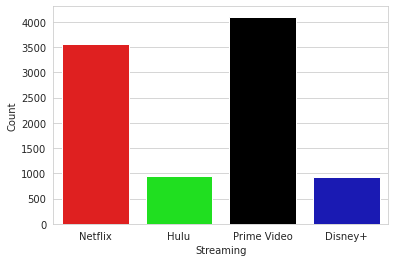

In [9]:
# Cria um gráfico para demonstrar a quantidade de filmes em cada plataforma

palette = ['r', 'lime', 'k', 'mediumblue']
sns.barplot(data=streaming_count, x='Streaming', y='Count', order=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], palette=palette)

O Prime Video é a plataforma de streaming com mais filmes em seu catálogo, seguido pela Netflix e com uma quantidade menor a Hulu e a Disney+

### Gêneros presentes na maior quantidade de filmes

Em uma perspectiva geral, vamos buscar entender quais os genêros que mais aparecem nos filmes

In [10]:
# Cria uma tabela de frequência de quantas vezes cada gênero aparece

genres_freq = {}

for genres, streaming in zip(df.loc[df['Genres'].notna()]['Genres'], df.loc[df['Genres'].notna()]['Streaming']):
    genre = genres.split(',')
    for i in range(len(genre)):
        if genre[i] in genres_freq :
            if streaming in genres_freq[genre[i]]:
                genres_freq[genre[i]][streaming] += 1
            else:
                genres_freq[genre[i]][streaming] = 1
            genres_freq[genre[i]]['all'] += 1
        else:
            genres_freq[genre[i]] = {}
            genres_freq[genre[i]]['all'] = 1
            genres_freq[genre[i]][streaming] = 1

In [11]:
# Utilizando a tabela de frequência cria um dataset que representa a quantidade de vezes que cada gênero aparece em cada plataforma de streaming e o total de vezes somados de todas elas.

df_genres = pd.DataFrame(data = genres_freq).T
df_genres.columns = ['Total', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']
df_genres = df_genres[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Total']]
df_genres.fillna(0, inplace=True)
df_genres = df_genres.astype(int)
df_genres = df_genres.sort_values('Total',ascending=False)
df_genres

,Netflix,Hulu,Prime Video,Disney+,Total
Drama,1618,449,1912,221,4200
Comedy,1405,303,1244,471,3423
Thriller,672,238,942,30,1882
Romance,603,163,749,111,1626
Action,589,170,708,125,1592
Family,331,80,322,645,1378
Adventure,343,129,383,356,1211
Documentary,444,140,453,130,1167
Crime,424,115,554,28,1121
Fantasy,249,100,235,264,848


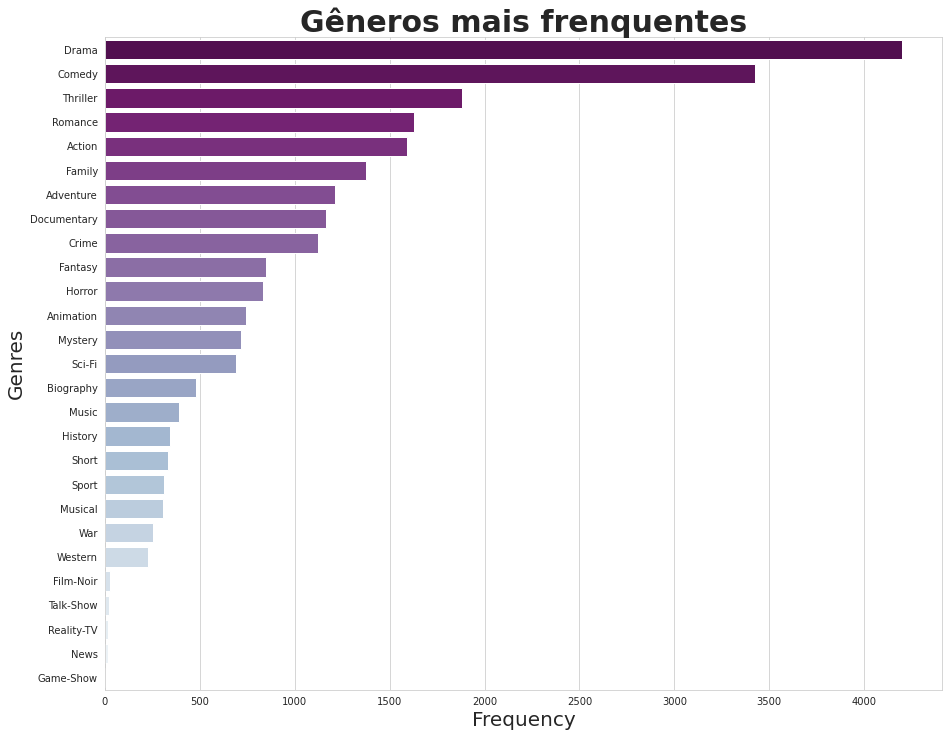

In [12]:
# Cria o gráfico dos gêneros mais frequentes em todas as plataformas conjuntas

plt.figure(figsize=(15,12))
sns.barplot(data=df_genres, x='Total', y=df_genres.index, palette='BuPu_r')
plt.title('Gêneros mais frenquentes', fontsize=30, fontweight='bold')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Genres', fontsize=20);

Ao considerar os filmes de uma forma geral, observamos no gráfico no acima que os 5 gêneros mais frequentes são Drama, Comédia, Suspense, Romance e Acão. Em seguida, analisamos se esses gêneros se repetem como os mais frequentes em cada plataforma

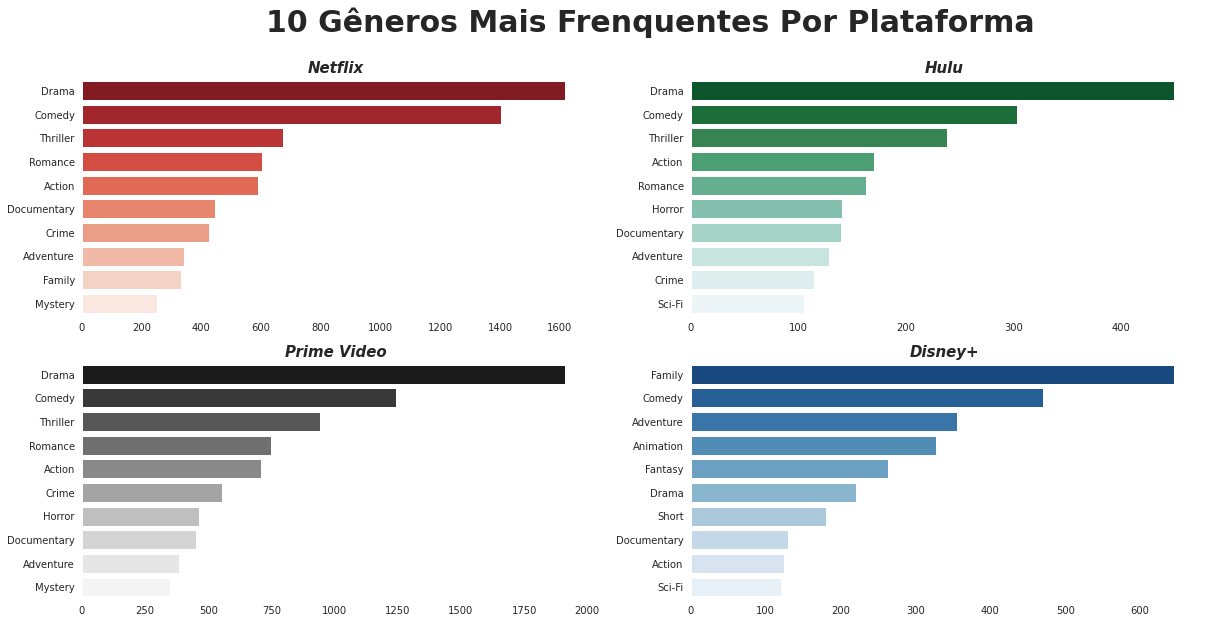

In [13]:
# Cria o gráfico dos gêneros mais frequentes por plataforma

streamings = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
streamings_palette = ['Reds_r', 'BuGn_r', 'Greys_r', 'Blues_r']
grid = [421, 422, 423, 424]

fig = plt.figure(figsize=(20,20))

for s, p, g in zip(streamings, streamings_palette, grid):
    ax = plt.subplot(g)
    df_genres_most5 = df_genres.sort_values(s, ascending=False).iloc[:10]
    sns.barplot(data=df_genres_most5, x=s, y=df_genres_most5.index, palette = p, ax=ax)
    ax.set_xlabel('')
    ax.set_title(s, fontsize=15, fontweight='bold', style='italic')
    ax.grid(visible=False)
    for spine in ['right', 'left', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)

fig.suptitle('10 Gêneros Mais Frenquentes Por Plataforma', x=0.52, y=0.93, size= 30, weight='heavy');


Os gêneros mais frequentes mantém o padrão anterior da visão geral nas plataformas da Netflix, Hulu e Prime Video, ou seja, os 5 principais gêneros continuam sendo Drama, Comédia, Suspense, Romance e Acão. Entretando, na Disney+ gêneros diferentes se repetem mais vezes, são eles Família, Comédia, Aventura, Animação e Fantasia. Assim, percebemos propostas de conteúdo diferente entre as plataformas, com as 3 streamings (Netflix, Hulu e Prime Video) focando em conteúdos mais maduros e a Disney+ focalizando um conteúdo mais familiar.

### Idade Mínima em cada plataforma

Queremos entender como a idade mínima muda em cada plataforma

In [14]:
# Limpando a coluna Age e transformando a coluna em int

df['Age'] = df['Age'].str.replace('+','', regex=False)
df['Age'] = df['Age'].str.replace('all','0', regex=False)
df['Age'] = df['Age'].astype(float)

In [15]:
# Função para criar um gráfico de barras de cada streaming

def barplot(grid, df, streaming, c):
    plt.subplot(grid)
    df = df.loc[df[streaming] == 1]
    df = df['Age'].value_counts().reset_index()
    df.columns = ['Age', 'Count']
    sns.barplot(x='Age', y='Count', data=df, color=c)
    plt.xlabel('Idade Mínima', fontsize=18)
    plt.ylabel(streaming, fontsize=18)

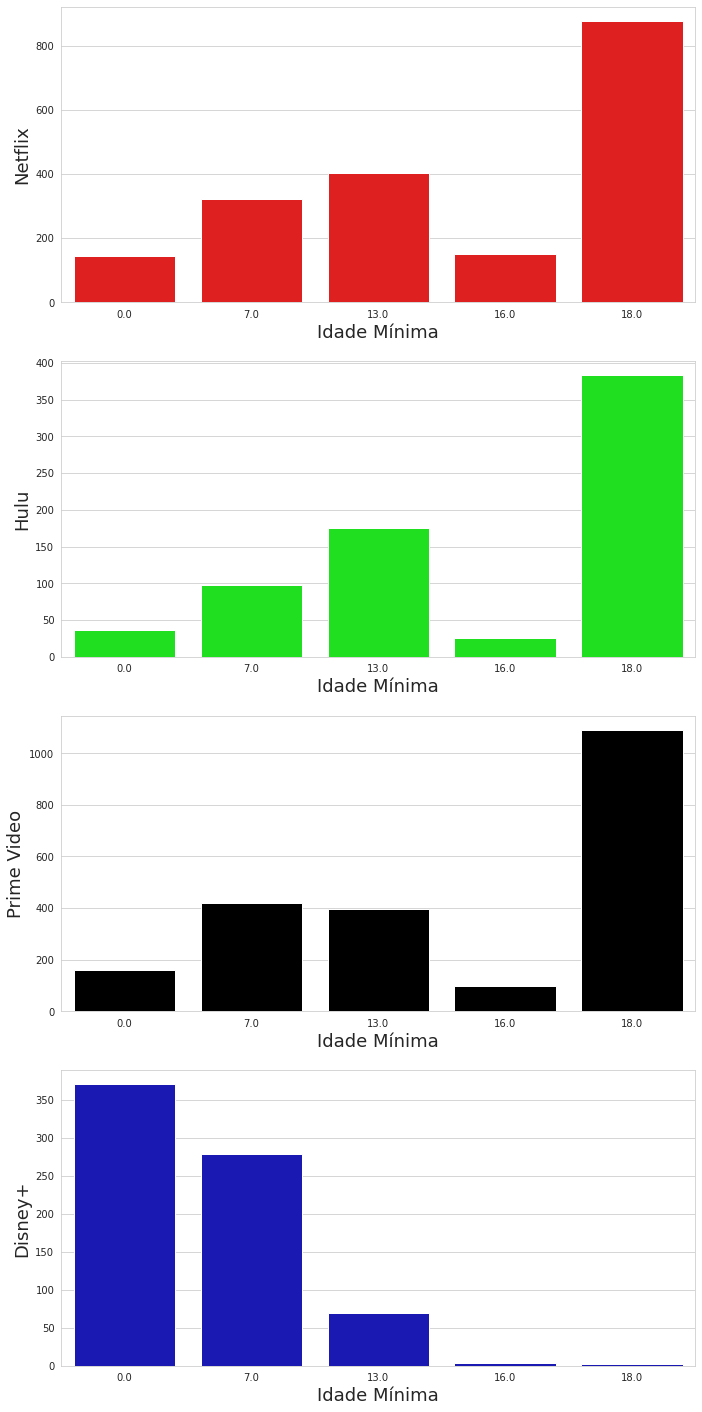

In [16]:
# Cria os gráficos de barras de cada streaming por idade

plt.figure(figsize = (25,25))

grids = [421, 423, 425, 427]
colors = ['r', 'lime', 'k', 'mediumblue']

for grid, streaming, color in zip(grids, streamings, colors):
    barplot(grid, df, streaming, color) 

Percebemos que em 3 das 4 plataformas a maioria dos filmes tem idade mínima `18` anos, com os outros filmes se distribuindo mais nas idades de `7` e `13`. A excessão fica por conta da plataforma Disney+, na qual a grande maioria dos filmes fica em `0` ou `7` anos de idade mínima, com alguns na classificação de `13` anos e apenas 7 filmes nas outras duas outras classificações. Esse resultado se completa bem quando somado ao gráfico de gêneros mais frequentes, visto que, foi demonstrado um conteúdo mais maduro dos streamings Netflix, Hulu e Prime Video refletindo assim nestes gráficos com umas classificação de idade maior, enquanto, verificou-se um conteúdo mais para a família na Disney+, logo, a idade mínima para os filmes também precisa ser menor para as crianças assistirem. A classificação mínima menor e os gêneros mais voltados a família se justificam, visto que, a Disney+ é um serviço de streaming de vídeo que contém apenas produções realizadas pela sua proprietária [The Walt Disney Company](https://pt.wikipedia.org/wiki/The_Walt_Disney_Company), a qual é mundialmente conhecida pelas suas produções infantis.

### Distribuição dos anos de produção dos filmes

Text(0.5, 1.0, 'Distribuição dos anos de produção dos filmes')

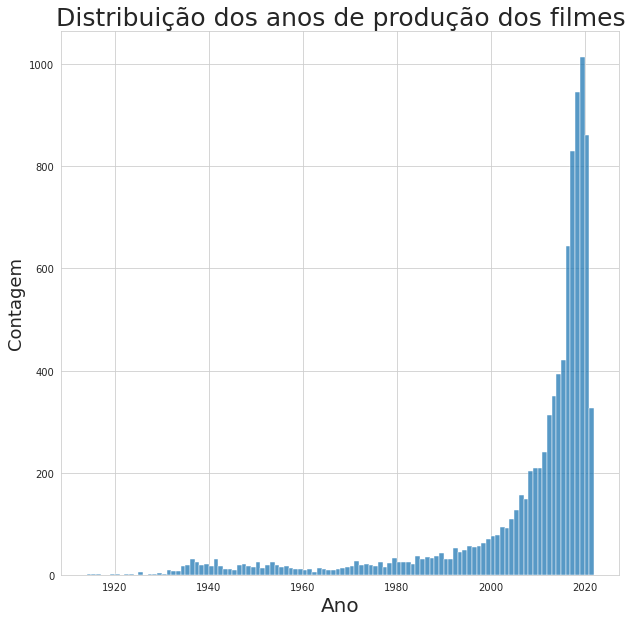

In [17]:
# Cria um histograma dos anos de produção dos filmes

bins = np.linspace(1914,2022, 109)
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='Year', bins=bins)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Contagem', fontsize=18)
plt.title('Distribuição dos anos de produção dos filmes', fontsize=25)

No histograma acima, o qual representa os anos de lançamento dos filmes presente nos streamings, é possivel observar uma distorção à esquerda, nos indicando que a maior parte da concentração dos dados está no fim da distribuição. Assim, analisando o gráfico temos que a maioria dos filmes presentes nas plataformas estão em sua maioria entre 2000 e 2020, com um pico de filmes lançados em 2019, após esse ano as produções diminuem um pouco, provavelmente, por causa da pandemia que reduziu a gravação de filmes por um tempo.

### Países com mais produções

In [18]:
# Cria um dicionário com a frequência que os países aparecem nas produções dos filmes

country_freq = {}

for country in df.loc[df['Country'].notna()]['Country']:
    country = country.split(',')
    for i in range(len(country)):
        if country[i] in country_freq:
            country_freq[country[i]] +=1
        else:
            country_freq[country[i]] = 1

In [19]:
# Cria um dataset utilizando o dicionário de frequência

df_country = pd.DataFrame.from_dict(data=country_freq, orient='index', dtype=int, columns=['Freq'])
df_country.sort_values('Freq', ascending=False, inplace=True)
df_country_10 = df_country.head(10)

Text(0.5, 0, 'Frequência')

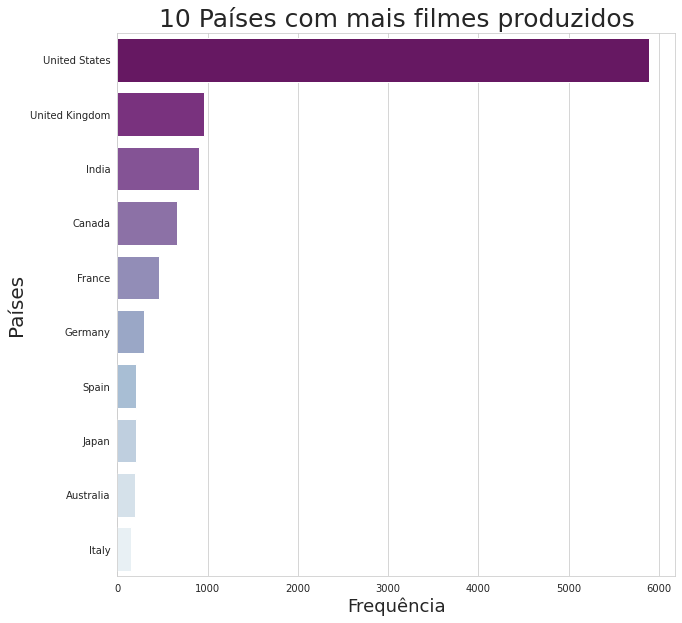

In [20]:
# Cria o gráfico dos países mais frequentes na produção dos filmes

plt.figure(figsize=(10,10))
sns.barplot(data=df_country_10, y=df_country_10.index, x='Freq', palette='BuPu_r')
plt.title('10 Países com mais filmes produzidos', fontsize=25)
plt.ylabel('Países', fontsize=20)
plt.xlabel('Frequência', fontsize=18)

Naturalmente, os Estados Unidos é país com mais filmes, visto que, além de ser o maior produtor de conteúdos no mundo, também é onde essas streamings analisadas se originaram. Em seguida, o Reino Unido, Índia, Canada, França completam os 5 países com mais filmes presentes nos streamings.

### Distribuição da duração dos filmes

In [21]:
# Função para criar um gráfico de kde de cada streaming

def kde(grid, df, streaming, c):
    plt.subplot(grid)
    ax = sns.kdeplot(x='Runtime', fill=True, data=df.loc[df[streaming] == 1], color=c)
    ax.grid(visible=False)
    plt.xlabel('Duração (Min)', fontsize=18)
    plt.ylabel(streaming, fontsize=18)
    plt.xlim(-50,350)

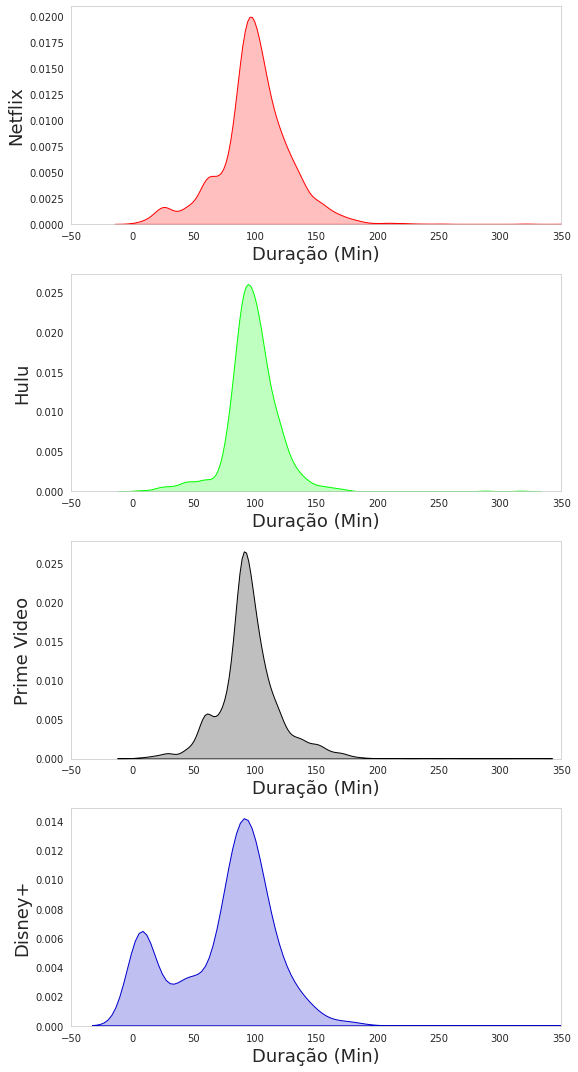

In [22]:
# Cria uma estimativa de densidade do kernel de cada streaming acerca da duração em minutos dos filmes

plt.figure(figsize=(15,15))

for streaming, color, grid in zip(streamings, colors, grids):
    kde(grid, df, streaming, color)
plt.tight_layout()

Uma boa quantidade de filmes tem sua duração entre 75-125 minutos em todas as plataformas. Faz sentido, considerando que o público em geral não pode assistir a um filme de, por exemplo, 3 horas de uma vez. Além desse intervalo de duração, a Disney+ possui um amontoado menor de filmes de 0-25 minutos, provavelmente, esse range aparece devido a algumas animações de pequena duração.

### Relação entre as classificações

Queremos entender se existe alguma relação entre as duas classificações (IMDb e Rotten Tomatoes), ou seja, se um filme receber uma nota alta no IMDb, se ela também será alta no Rotten Tomatoes.

In [23]:
# Limpando a Coluna do Rotten Tomatoes e transformando para o tipo inteiro

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.split('/').str[0]
df.dropna(subset=['Rotten Tomatoes'], inplace=True)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(float)
df['Rotten Tomatoes'] = df['Rotten Tomatoes']/10

In [24]:
# Limpando a Coluna do IMDb e transformando para o tipo float

df['IMDb'] = df['IMDb'].str.split('/').str[0]
df['IMDb'] = df['IMDb'].astype(float)

<AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>

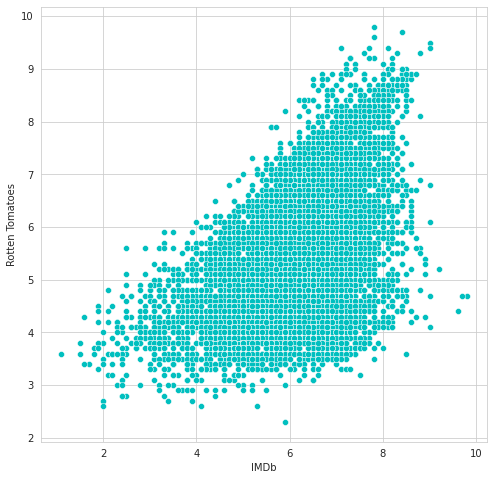

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='IMDb', y='Rotten Tomatoes', color='c')

### Avaliação dos filmes em cada plataforma

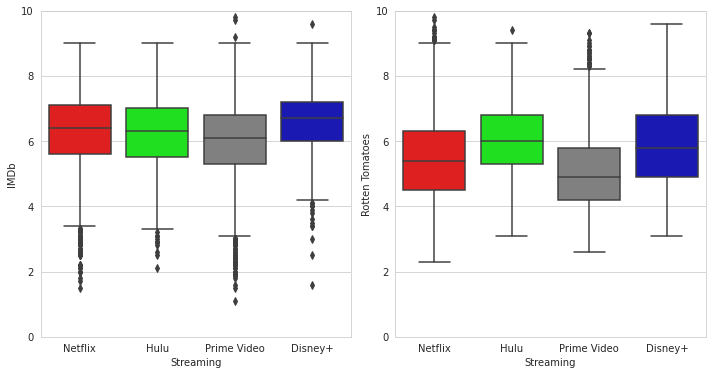

In [26]:
colors[2] = 'grey'
#sns.color_palette(colors)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='Streaming', y='IMDb', data=df, palette=sns.color_palette(colors))
plt.ylim(0,10)
plt.subplot(2,2,2)
sns.boxplot(x='Streaming', y=df.loc[df['IMDb'].notnull()]['Rotten Tomatoes'], data=df, palette=sns.color_palette(colors))
plt.ylim(0,10)
plt.tight_layout()

É interessante observar que mesmo tendo uma relação, desmontrada no gráfico de dispersão anterior, as avaliações do IMDb e Rotten Tomatoe de cada plataforma são diferentes. Os filmes considerados outliers na avaliação do IMDb receberam classificações mais altas no Rotten Tomatoes, assim, eles desaparecem do gráfico e, consequentimente, tanto os limites inferiores quanto as médias dos boxplots são diminuidas. Outro fato importante a ser notado é o aparecimento de outliers superiores no boxplot da netflix apesar do mesmo manter seu limite inferior, o que indica que alguns filmes receberam notas muito altas no Rotten Tomatoes, as quais não haviam recebido no IMDb

Podemos confirmar essa diferença de avaliação comparando a quantidade de vezes que cada plataforma tem filmes no top 30 de filmes avaliados:

In [27]:
print('Top 30 filmes pela avaliação do IMDb:\n')
print(df.loc[df['IMDb'].notnull()].sort_values('IMDb', ascending=False)[0:30]['Streaming'].value_counts())

Top 30 filmes pela avaliação do IMDb:

Prime Video    13
Netflix        11
Disney+         5
Hulu            1
Name: Streaming, dtype: int64


In [28]:
print('Top 30 filmes pela avaliação do Rotten Tomatoes:\n')
print(df.loc[df['IMDb'].notnull()].sort_values('Rotten Tomatoes', ascending=False)[0:30]['Streaming'].value_counts())

Top 30 filmes pela avaliação do Rotten Tomatoes:

Netflix        21
Prime Video     4
Disney+         3
Hulu            2
Name: Streaming, dtype: int64


O Prime Video e a Netflix lideram os filmes no top 30 em relação a avaliações do IMDb, enquanto a Netflix lidera com grande folga em relação a avaliação do Rotten Tomatoes, possuindo 21 dos 30 filmes. Assim, percebe-se que apesar de uma média menor em relação as duas avaliações, a Netflix e o Prime Video apresentam filmes mais bem classificados, dependendo do critério de cada pessoa para definir qual das duas é superior.

### Correlação entre as variáveis

<AxesSubplot:>

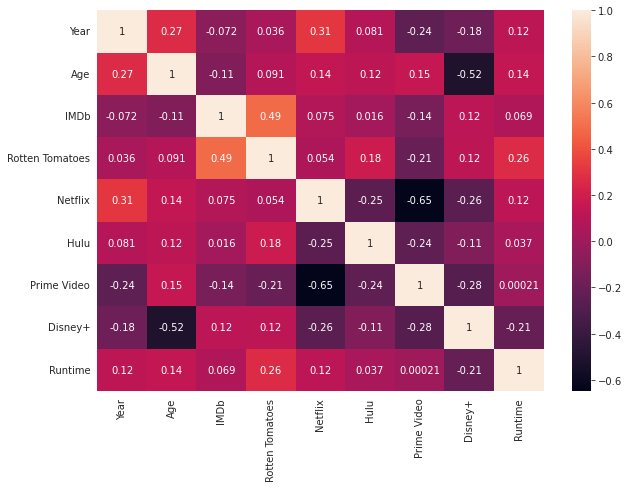

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

É interessante destacar no mapa de calor algumas correlações, a correlação negativa de `-0.52` da Disney+ com a Idade e também a correlação de 0.49 do Rotten Tomatoes com o IMDb, ambas correlações analisamos mais a fundo em tópicos anteriores. Assim, a matriz de correlações não apresenta mais nenhuma correlação mais forte boa de ser analisada entre as colunas.

## Conclusões

A Netflix, o Prime Video e a Hulu apresentaram muitos aspectos em comum, possuindo uma proposta de filmes bem parecidas, onde observamos a maioria dos filmes com classificação mínima de 18 anos e um tempo de duração variando entre 75-125 minutos, além de possuir os mesmos gêneros mais frequêntes: Drama, Comédia, Suspense, Romance e Ação. Assim, eles estão claramente buscando atingir os públicos mais adultos com seus filmes.

Um ponto a ser destacado é em relação a filmes bem avaliados, que é onde a Netflix se destaca apresentando 21 dos 30 melhores filmes de acordo com o Rotten Tomatoes e em 11 dos 30 de acordo com o IMDb. Vale mencionar também o Prime Video que aparece mais baixo na avaliação do Rotten Tomatoes, porém é o primeiro em filmes mais bem avaliados de acordo com o IMDb, tendo 13 dos 30 filmes.

Já a Disney+ apresenta uma proposta diferente, possuindo em sua maioria filmes com classificação mínima de 0 ou 7 anos, além de filmes vairando entre 75-125 também possui animações mais curtas e tem como gêneros mais frequentes: Família, Comédia, Aventura, Animação e Fantasia. Logo, eles estão visando atingir com seus filmes tanto a família quanto as crianças.

Portanto, se você busca filmes com uma temática mais adulta a Netflix e o Prime Video são boas escolhas dependendo do seus gostos, seguidos pela Hulu que possui alguns bons titulos, e se você procura filmes para assistir com a família ou para a criançada a Disney+ é a melhor escolha.